<CENTER><img src="https://github.com/artfisica/hackathon2017bigdata/blob/master/analysis_notebooks/pictures/opendata-top-transblack.png" style="width:40%"></CENTER>

<CENTER><h1>Simple CVS to ROOT C++ notebook example</h1></CENTER>

In [1]:
%jsroot on

In [2]:
#include "Riostream.h"
#include "TString.h"
#include "TFile.h"
#include "TTree.h"
#include "TSystem.h"
#include <stdio.h>
#include <stdlib.h>

In [3]:
//This two lines can be commented out. You just need it once, and in case the CVS file was not provided already
//system("wget http://opendata.atlas.cern/visualisations/CrossFilter/outreach.csv");

//If the file is downloaded with the line above, you *need* to remove the first line of the outreach.csv

In [4]:
TString dir = gSystem->UnixPathName(__FILE__);
dir.ReplaceAll("AGSEC10.C","");
dir.ReplaceAll("/./","/");

TFile *f = new TFile("AGSEC10.root","RECREATE");

In [5]:
TTree *tree = new TTree("data","data from csv file");
// The file inside has -------->   "entry","HHID","A10itemcod","Farm_Implement","A10Q1_other","a10q1","a10q2","a10q3","a10q4","a10q5","a10q6","a10q7","a10q8","hh","wgt_X"
tree->ReadFile("AGSEC10_clean.csv","entry/I:HHID/C:A10itemcod/I:Farm_Implement/C:A10Q1_other/C:a10q1/I:a10q2/I:a10q3/I:a10q4/I:a10q5/I:a10q6/I:a10q7/I:a10q8/I:hh/C:wgt_X/F",',');
f->Write();

TTree::ReadStream:0: RuntimeWarning: Couldn't read formatted data in "A10itemcod" for branch A10itemcod on line 1; ignoring line
TTree::ReadStream:0: RuntimeWarning: Read too few columns (3 < 15) in line 1; ignoring line


In [6]:
system("ls -lhrt AGSEC10*");
system("echo");
system("echo 'This dataset contains the below number of data points'");
system("wc -l AGSEC10_clean.csv");

-rw-r--r-- 1 summerstudent users 4.5M Nov 11 19:33 AGSEC10.csv
-rw-r--r-- 1 summerstudent users 4.1M Nov 11 22:17 AGSEC10_clean.csv
-rw-r--r-- 1 summerstudent users 581K Nov 11 23:21 AGSEC10.root

This dataset contains the below number of data points
54712 AGSEC10_clean.csv


In [7]:
TFile *_file0 = TFile::Open("AGSEC10.root");

## Can we make use of BigData to improve subsidise in Agriculture equitment?

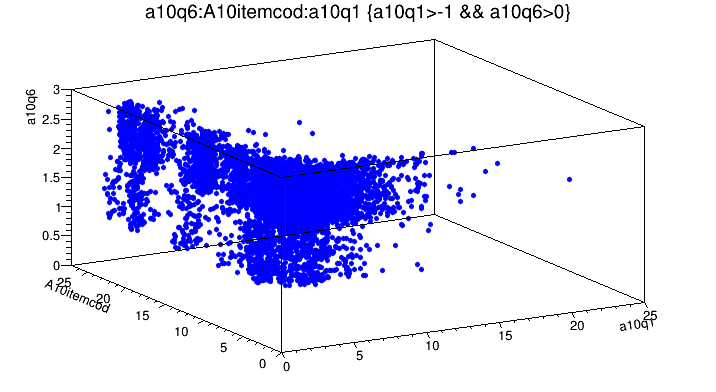

In [8]:
TCanvas *TypeItemsOwnVsRented3D = new TCanvas("TypeItemsOwnVsRented3D","number of Items Owned Vs if Rented or borrow",10,10,720,420);
data->Draw("a10q6:A10itemcod:a10q1","a10q1>-1 && a10q6>0","SURF");
TypeItemsOwnVsRented3D->Draw();

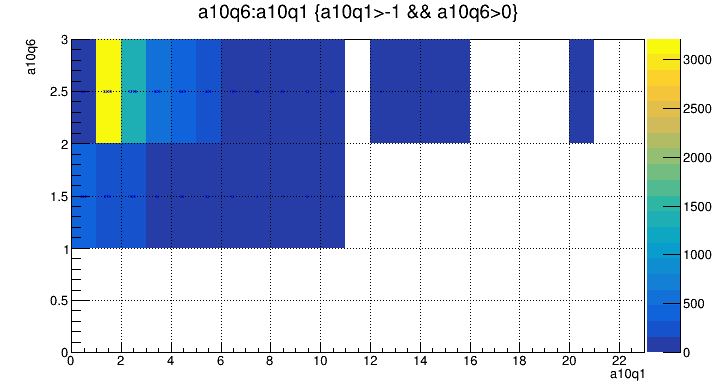

In [9]:
TCanvas *nItemsOwnVsRented = new TCanvas("nItemsOwnVsRented","number of Items Owned Vs if Rented or borrow",10,10,720,420);
data->Draw("a10q6:a10q1","a10q1>-1 && a10q6>0","textcolz");
nItemsOwnVsRented->SetGrid();
nItemsOwnVsRented->Draw();

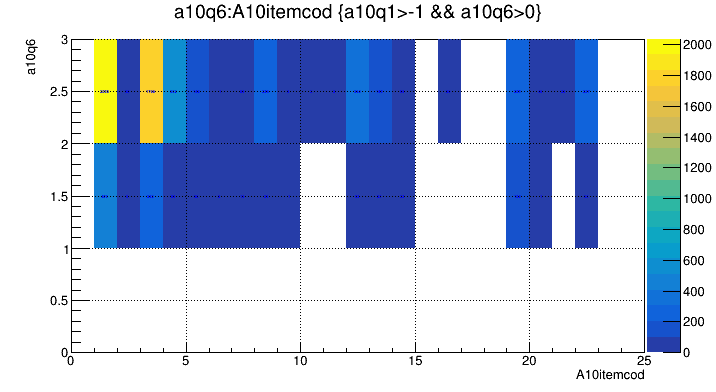

In [10]:
TCanvas *TypeItemsOwnVsRented = new TCanvas("TypeItemsOwnVsRented","number of Items Owned Vs if Rented or borrow",10,10,720,420);
data->Draw("a10q6:A10itemcod","a10q1>-1 && a10q6>0","textcolz");
TypeItemsOwnVsRented->SetGrid();
TypeItemsOwnVsRented->Draw();

<CENTER><h2>this is my title</h2>
<p>test ggbgfggth</p></CENTER>

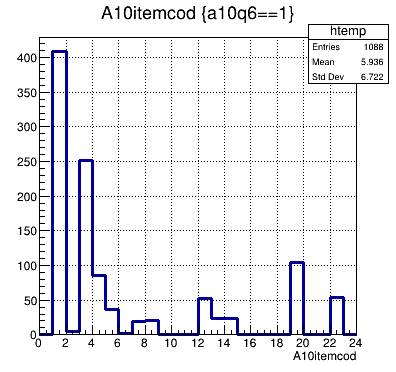

In [11]:
TCanvas *ItemCodeVsYesRented = new TCanvas("ItemCodeVsYesRented","Item Code Vs Yes Rented or borrow",10,10,400,400);
data->Draw("A10itemcod","a10q6==1");
ItemCodeVsYesRented->SetGrid();
ItemCodeVsYesRented->Draw();

<CENTER><h2>this is my title</h2>
<p>test ggbgfggth</p></CENTER>

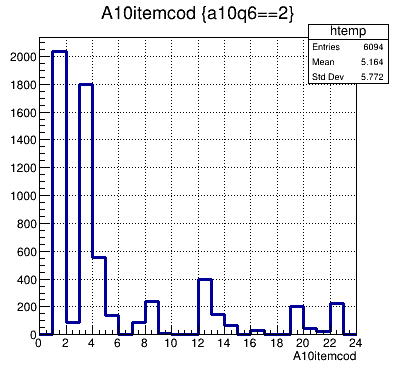

In [12]:
TCanvas *ItemCodeVsNotRented = new TCanvas("ItemCodeVsNotRented","ItemCode Vs Not Rented or borrow",10,10,400,400);
data->Draw("A10itemcod","a10q6==2");
ItemCodeVsNotRented->SetGrid();
ItemCodeVsNotRented->Draw();

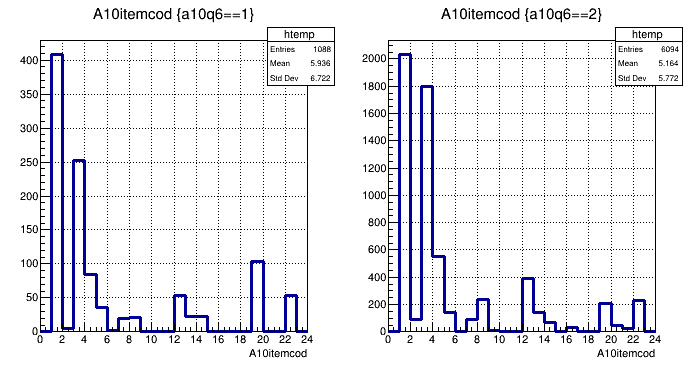

In [13]:
TCanvas *comparison = new TCanvas("comparison","ItemCode Vs Yes/Not Rented or borrow",10,10,700,400);
comparison->Divide(2,1);
comparison->cd(1);
comparison->cd(1)->SetGrid();
data->Draw("A10itemcod","a10q6==1");
comparison->cd(2);
comparison->cd(2)->SetGrid();
data->Draw("A10itemcod","a10q6==2");
comparison->Draw();

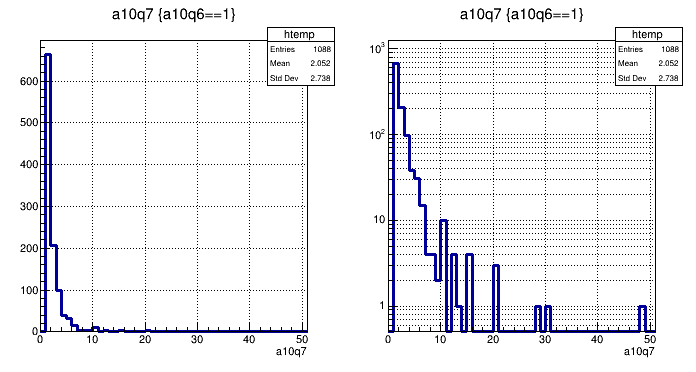

In [14]:
TCanvas *comparisonNrented = new TCanvas("comparisonNrented","ItemCode Vs Yes/Not Rented or borrow",10,10,700,400);
comparisonNrented->Divide(2,1);
comparisonNrented->cd(1);
comparisonNrented->cd(1)->SetGrid();
data->Draw("a10q7","a10q6==1");
comparisonNrented->cd(2);
comparisonNrented->cd(2)->SetGrid();
comparisonNrented->cd(2)->SetLogy();
data->Draw("a10q7","a10q6==1");
comparisonNrented->Draw();

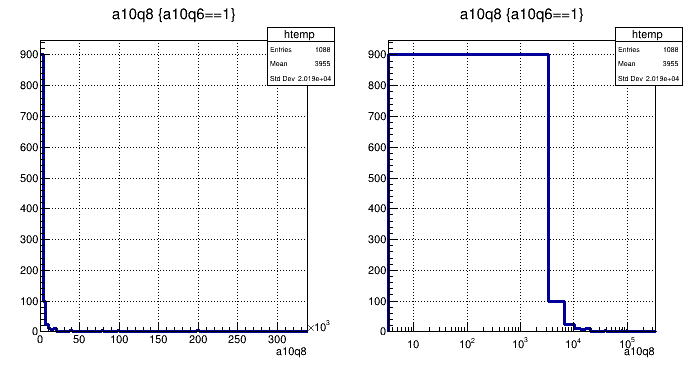

In [15]:
TCanvas *comparisonPriceRented = new TCanvas("comparisonPriceRented","ItemCode Vs Yes/Not Rented or borrow",10,10,700,400);
comparisonPriceRented->Divide(2,1);
comparisonPriceRented->cd(1);
comparisonPriceRented->cd(1)->SetGrid();
data->Draw("a10q8","a10q6==1");
comparisonPriceRented->cd(2);
comparisonPriceRented->cd(2)->SetGrid();
comparisonPriceRented->cd(2)->SetLogx();
data->Draw("a10q8","a10q6==1");
comparisonPriceRented->Draw();

### number items rented or borrow Vs the amount of money spent in rented

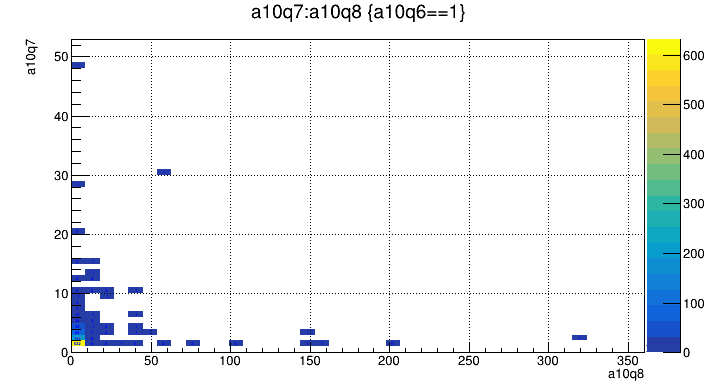

In [16]:
TCanvas *TypeItemsVspriceRented = new TCanvas("TypeItemsVspriceRented","number of Items Owned Vs if Rented or borrow",10,10,720,420);
data->Draw("a10q7:a10q8","a10q6==1","textcolz");
TypeItemsVspriceRented->SetGrid();
TypeItemsVspriceRented->Draw();

Let's pass now to other notebook in python to extend this analysis, check for <b>(name of the notebook)</b>